<a href="https://colab.research.google.com/github/Ariara61/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_377~395.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[06. 차원 축소]**

#01 차원 축소(Dimension Reduction) 개요
* 차원 축소: 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
* 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소(sparse)한 구조를 가지게 됨
* 수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어짐
* 피처가 많을 경우 개별 피처간에 상관관계가 높을 가능성이 큼 → 선형 모델에서는 입력 변수의 상관관계가 높을 경우 이로 인한 다중 공산성 문제로 모델의 예측 성능 저하
* 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할수 있음
* 차원 축소를 할 경우 학습 데이터의 크기가 줄어들어서 학습에 필요한 처리 능력도 줄일 수 있음
>

* 피처 선택(feature selection): 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택
* 피처 추출(feature extraction): 기존 피처를 저차원의 중요 피처로 압축해서 추출 → 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이 됨
 * 기존 피처를 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출
>
* PCA, SVD, NMF는 잠재적인 요소를 찾는 대표적인 차원 축소 알고리즘
* 매우 많은 픽셀로 이뤄진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축을 수행할 수 있음
* 변환된 이미지는 원본 이미지보다 훨씬 적은 차원이기 때문에 분류 수행 시에 과적합(overfitting) 영향력이 작아져서 오히려 원본 데이터로 예측하는 것보다 예측 성능을 더 끌어올릴 수 있음
* 차원 축소 알고리즘은 문서 내 단어들의 구성에서 숨겨져 있는 시맨틱(Semantic) 의미나 토픽(Topic)을 잠재 요소로 간주하고 이를 찾아낼 수 있음
* SVD와 NMF는 이러한 시맨틱 토픽(Semantic Topic) 모델링을 위한 기반 알고리즘으로 사용됨


# 02. PCA(Principal Component Analysis)
**PCA 개요**
* PCA(Principal Component Analysis)는 가장 대표적인 차원 축소 기법
* 여러 변수간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법
* PCA로 차원을 축소할 때는 기존 데이터의 정보 유실이 최소화됨
* 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 됨 (분산이 데이터 특성을 가장 잘 나타내는 것으로 간주)
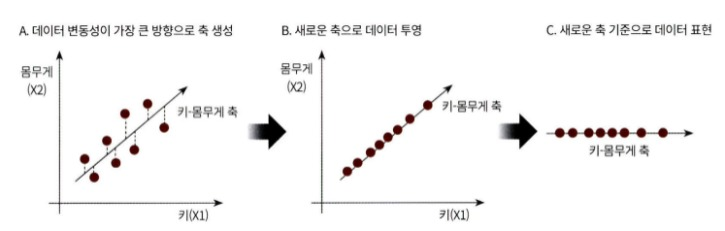

* 가장 큰 데이터 변동성(Variance)을 기반으로 첫 번째 벡터 축을 생성하고, 두 번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 함. 세번째 축은 다시 두번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성함.
* 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소됨
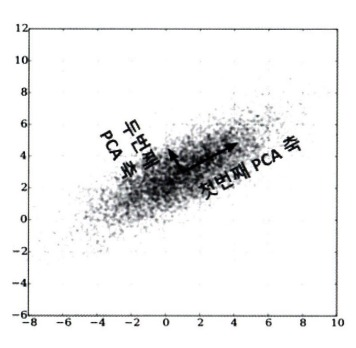

* 선형대수 관점: 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고, 고유벡터에 입력 데이터를 선형 변환하는 것. 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타냄.
 * 고윳값(eigenvalue): 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타냄
 * 선형 변환: 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환함. 특정 벡터를 하나의 공간에서 다른 공간으로 투영하는 개념이며, 이 행렬을 바록 공간으로 가정함
 * 분산: 한 개의 특정한 변수의 데이터 변동을 의미하나, 공분산은 두 변수 간의 변동을 의미함
 * 고유벡터: 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터를 지칭. 고유벡터는 여러 개가 존재하며, 정방 행렬은 최대 그 차원 수만큼의 고유벡터를 가질 수 있음. 행렬이 작용하는 힘의 방향과 관계가 있어서 행렬을 분해하는 데 사용됨
 * 공분산 행렬: 정방행렬(Diagonal Matrix)이며 대칭행렬(Symmmetric Matrix). 열과 행이 같은 행렬을 지칭함. $A^t = A$인 행렬을 대칭행렬이라고 부름. 개별 분산값을 대각 원소로 하는 대칭행렬. 항상 고유벡터를 직교행렬(orthogonal matrix)로, 고유값을 정방 행렬로 대각화할 수 있음.
 * 공분산 행렬을 C라고 하면, $P \sum P^T$로 분해할 수 있고,
 $C = \begin{bmatrix}e_{1}&e_{n}\end{bmatrix} \begin{bmatrix}  \lambda_{1}  &  \ldots & 0 \\  \ldots &  \ldots &  \ldots  \\ 0 &  \ldots &   \lambda _{n}  \end{bmatrix}  \begin{bmatrix} e_{1}^t  \\  \ldots \\ e_{n}^t  \end{bmatrix} $
 와 대응됨.
 * 즉, 공분산 C는 고유벡터 직교 행렬 * 고유값 정방 행렬 * 고유벡터 직교 행렬의 전치 행렬로 분해됨
 * e는 i번째 고유벡터를, $\lambda _{i}$는 i번째 고유벡터의 크기를 의미함. $e_{1}$는 가장 분산이 큰 방향을 가진 고유벡터이며, $e_{2}$는 $e_{1}$에 수직이면서 다음으로 가장 분산이 큰 방향을 가진 고유벡터임.
 * **입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA임**
 * PCA가 수행되는 스텝
  1. 입력 데이터 세트의 공분산 행렬을 생성
  2. 공분산 행렬의 고유벡터와 고유값을 계산
  3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출
  4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환
 * PCA는 많은 속성으로 구성된 원본 데이터를 그 핵심을 구성하는 데이터로 압축한 것



In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF["target"] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


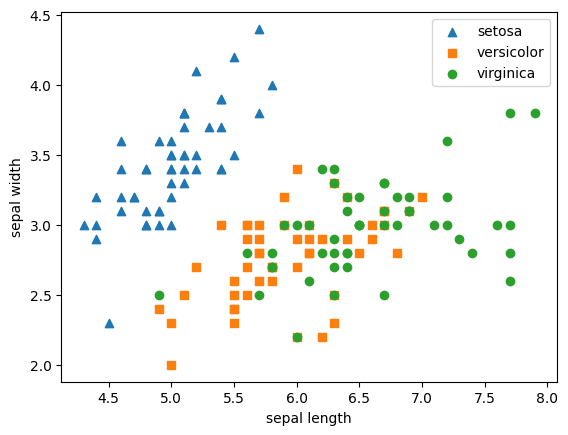

In [2]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ["^", "s", "o"]

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF[irisDF["target"] == i]["sepal_length"]
  y_axis_data = irisDF[irisDF["target"] == i]["sepal_width"]
  plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

* Setosa 품종의 경우 sepal width가 3.0보다 크고, sepal length가 6.0 이하인 곳에 일정하게 분포돼 있음
* Versicolor와 virginica의 경우 sepal width와 sepal length 조건만으로는 분류가 어려운 복잡한 조건
>
* PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받음
* 따라서 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요함

In [3]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

* 사이킷런은 PCA 변환을 위해 PCA 클래스를 제공
* 파라미터: n_components - PCA로 변환할 차원의 수를 의미

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


* iris_pca는 변환된 PCA 데이터 세트를 150x2 넘파이 행렬로 가지고 있음

In [5]:
# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ["pca_component_1", "pca_component_2"]
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca["target"] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


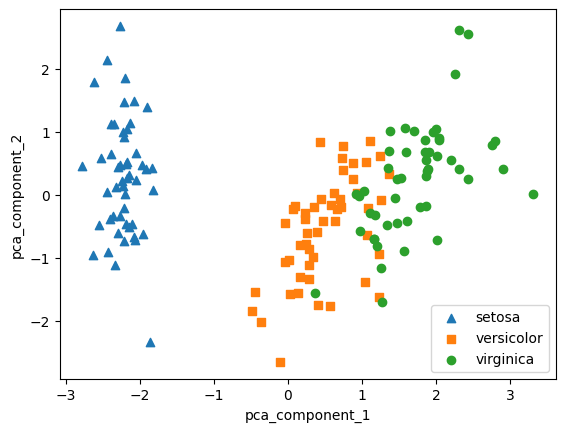

In [6]:
# setosa는 세모, versicolor를 네모, virginical를 동그라미로 표시
markers = ["^", "s", "o"]

# pca_component_1을 x축, pc_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
  x_axis_data = irisDF_pca[irisDF_pca["target"] == i]["pca_component_1"]
  y_axis_data = irisDF_pca[irisDF_pca["target"] == i]["pca_component_2"]
  plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel("pca_component_1")
plt.ylabel("pca_component_2")
plt.show()

* PCA로 변환한 후에도 pca_component_1 축을 기반으로 Setosa 품종은 명확하게 구분이 가능합니다.
* Vergicolor와 Virgincica는 pca_component_1 축을 기반으로 서로 겹치는 부분이 일부 존재하지만, 비교적 잘 구분됨. → PCA의 첫 번째 새로운 축인 pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문
>
* PCA 객체의 explained_variance_ration_ 속성은 전체 변동성의 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 제공함

In [7]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


* pca_component_1이 전체 변동성의 72.9%를 차지하며, pca_component_2가 약 22.8%을 차지함


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring = "accuracy", cv = 3)
print("원본 데이터 교차 검증 개별 정확도: ", scores)
print("원본 데이터 평균 정확도: ", np.mean(scores))

원본 데이터 교차 검증 개별 정확도:  [0.98 0.94 0.96]
원본 데이터 평균 정확도:  0.96


In [9]:
pca_X = irisDF_pca[["pca_component_1", "pca_component_2"]]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring = "accuracy", cv = 3)
print("PCA 변환 데이터 교차 검증 개별 정확도: ", scores_pca)
print("PCA 변환 데이터 평균 정확도: ", np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도:  [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도:  0.88


* 원본 데이터 세트 대비 에측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수밖에 없음

In [12]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel("credit_card.xls", header = 1, sheet_name = "Data").iloc[0:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


* 30,000개의 레코드와 24개의 속성을 가지고 있음
* default payment next month 속성이 Target 값으로 "다음달 연체 여부"를 의미하며 "연체"일 경우 1, "정상납부"가 0임

In [13]:
df.rename(columns = {"PAY_0":"PAY_1", "default payment next month":"default"}, inplace = True)
y_target = df["default"]
X_features = df.drop("default", axis = 1)

* 23개의 속성 데이터 세트가 있으나 각 속성끼리 상관도가 매우 높음

<Axes: >

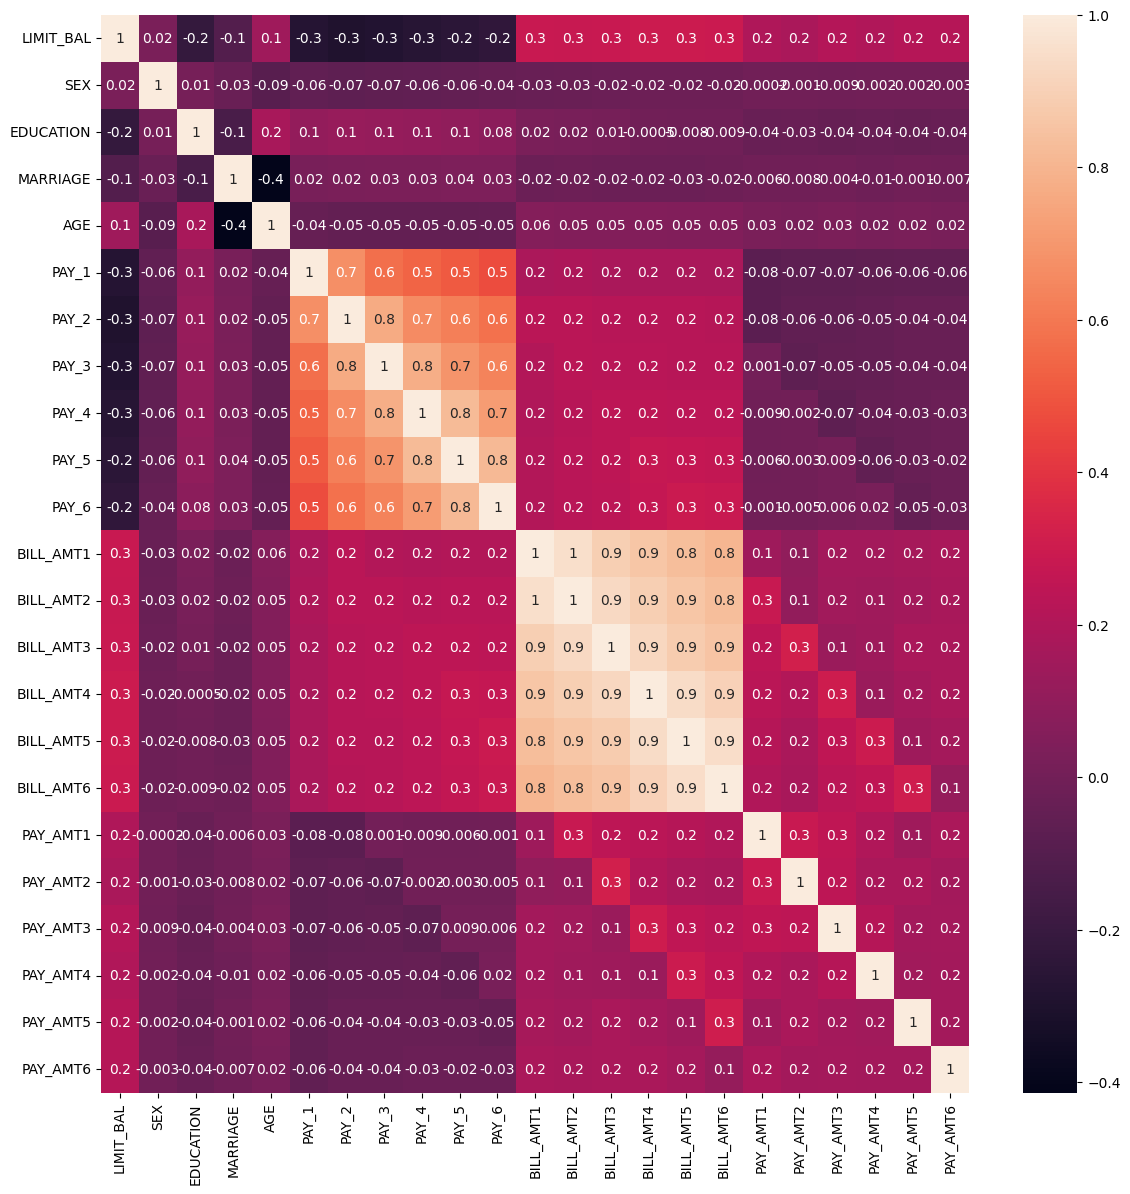

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize = (14, 14))
sns.heatmap(corr, annot = True, fmt = ".1g")

* BILL_AMT1 ~ BILL_AMT6 6개 속성끼리의 상관도가 0.9 이상으로 매우 높음
* PAY_1 ~ PAY_6까지의 속성 역시 상관도가 높음
* 이렇게 높은 상관도를 가진 속성들은 소수의 PCA만으로도 자연스럽게 이 속성들의 변동성을 수정할 수 있음

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ["BILL_AMT" + str(i) for i in range(1, 7)]
print("대상 속성명: ", cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components = 2)
pca.fit(df_cols_scaled)
print("PCA Component별 변동성: ", pca.explained_variance_ratio_)

대상 속성명:  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성:  [0.90555253 0.0509867 ]


* 단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있으며 특히 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 6개 속성의 상관도가 매우 높음

In [18]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators = 300, random_state = 156)
scores = cross_val_score(rfc, X_features, y_target, scoring = "accuracy", cv = 3)

print("CV = 3인 경우의 개별 Fold 세트별 정확도: ", scores)
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

CV = 3인 경우의 개별 Fold 세트별 정확도:  [0.8083 0.8196 0.8232]
평균 정확도: 0.8170


* 3개의 교차 검증 세트에서 평균 예측 정확도는 약 81.71%를 나타냄

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행.
pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring = "accuracy", cv = 3)

print("CV = 3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: ", scores_pca)
print("PCA 변환 데이터 세트 평균 정확도: {0:.4f}".format(np.mean(scores_pca)))

CV = 3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:  [0.7889 0.7968 0.7998]
PCA 변환 데이터 세트 평균 정확도: 0.7952


* 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1~2% 정도의 예측 성능 저하만 발생함

# 03 LDA(Linear Discriminant Analysis)
**LDA 개요**
* LDA(Linear Discriminant Anlysis): 선형 판별 분석법으로 불리며, PCA와 매우 유사함
* PCA와 유사하게 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법이지만, 중요한 차이는 LDA는 지도학습의 분류(Classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소함
* PCA는 입력 데이터의 변동성을 가장 큰 축을 찾았지만, LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾음
* LDA는 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class-scatter)의 비율을 최대화하는 방식으로 차원을 축소함. 즉, 클래스간의 분산은 최대한 크게 가져가고, 클래스 내부의 분산은 최대한 작게 가져가는 방식.
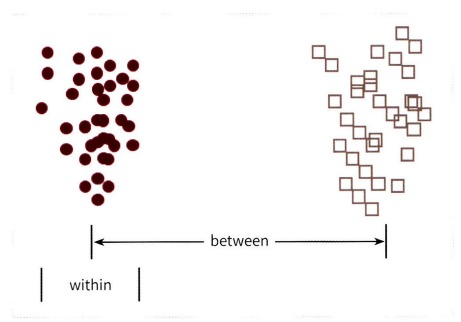

* LDA를 구하는 스텝
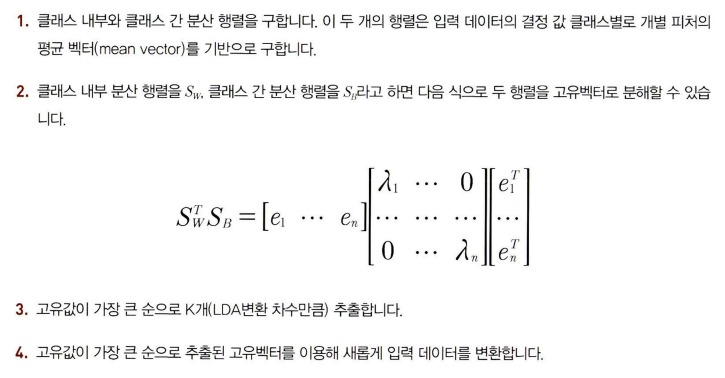

**붓꽃 데이터 세트에 LDA 적용하기**

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_sclaed = StandardScaler().fit_transform(iris.data)

* LDA에서 한 가지 유의해야 할 점은 PCA와 다르게 비지도학습이 아닌 지도학습이라는 것임. 즉, 클래스의 결정값이 변환 시에 필요함.

In [22]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


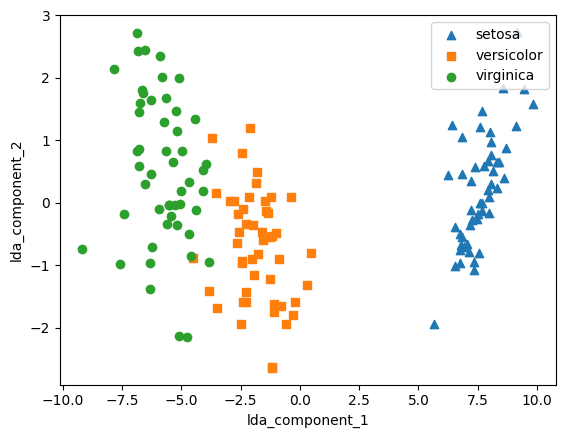

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ["lda_component_1", "lda_component_2"]
irisDF_lda = pd.DataFrame(iris_lda, columns = lda_columns)
irisDF_lda["target"] = iris.target

# setosa는 세모, versicolor은 네모, virginica는 동그라미로 표현
markers = ["^", "s", "o"]

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda["target"] == i]["lda_component_1"]
  y_axis_data = irisDF_lda[irisDF_lda["target"] == i]["lda_component_2"]

  plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend(loc = "upper right")
plt.xlabel("lda_component_1")
plt.ylabel("lda_component_2")
plt.show()